# Student Academic Performance Analysis

Objective:
To analyze student exam performance data to identify weak subjects,
top-performing students, and gender-based performance differences.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("student_performance_100.xlsx")
df.head(10)

,student_id,gender,math_score,reading_score,writing_score,attendance_percent
0,1,Male,92,36,78,89
1,2,Female,47,36,85,64
2,3,Male,73,88,92,71
3,4,Male,63,35,95,75
4,5,Male,91,53,64,85
5,6,Female,43,36,65,85
6,7,Male,77,87,99,80
7,8,Male,44,78,50,98
8,9,Male,91,66,57,95
9,10,Female,69,66,86,92


## Dataset Structure Overview

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   student_id          100 non-null    int64
 1   gender              100 non-null    str  
 2   math_score          100 non-null    int64
 3   reading_score       100 non-null    int64
 4   writing_score       100 non-null    int64
 5   attendance_percent  100 non-null    int64
dtypes: int64(5), str(1)
memory usage: 4.8 KB


### Interpretation

- The dataset contains 100 student records.
- All subject score columns are stored as integer data types.
- There are no missing values present in the dataset.
- The dataset is clean and ready for analysis.

## Statistical Summary of Scores

In [4]:
df.describe()

,student_id,math_score,reading_score,writing_score,attendance_percent
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,63.810000,64.54000,69.690000,81.170000
std,29.011492,20.402364,17.98227,20.336411,11.125596
min,1.000000,30.000000,35.00000,33.000000,60.000000
25%,25.750000,44.000000,51.75000,51.000000,71.000000
50%,50.500000,64.000000,64.50000,73.000000,83.000000
75%,75.250000,81.000000,80.50000,89.250000,91.000000
max,100.000000,99.000000,98.00000,99.000000,99.000000


### Interpretation

- The mean scores indicate overall academic performance across subjects.
- The standard deviation shows moderate variation in student scores.
- The minimum and maximum values confirm the full score range distribution.
- The median (50%) values are close to the mean, suggesting balanced score distribution without extreme skewness.

In [12]:
import pandas as pd
df = pd.read_excel("student_performance_100.xlsx")

### Attendence impact on academic scores

In [18]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df.head()

,student_id,gender,math_score,reading_score,writing_score,attendance_percent,total_score
0,1,Male,92,36,78,89,206
1,2,Female,47,36,85,64,168
2,3,Male,73,88,92,71,253
3,4,Male,63,35,95,75,193
4,5,Male,91,53,64,85,208


In [14]:
df[["attendance_percent", "total_score"]].corr()

,attendance_percent,total_score
attendance_percent,1.000000,0.178565
total_score,0.178565,1.000000


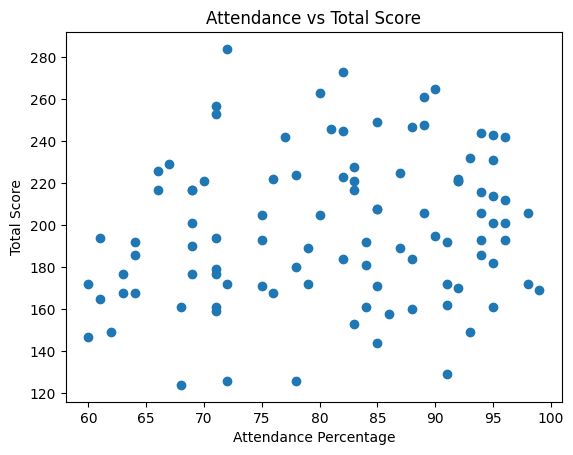

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["attendance_percent"], df["total_score"])
plt.xlabel("Attendance Percentage")
plt.ylabel("Total Score")
plt.title("Attendance vs Total Score")
plt.show()

##### The scattered dots show an upward pattern, indicating that students with higher attendance generally achieve higher total scores.

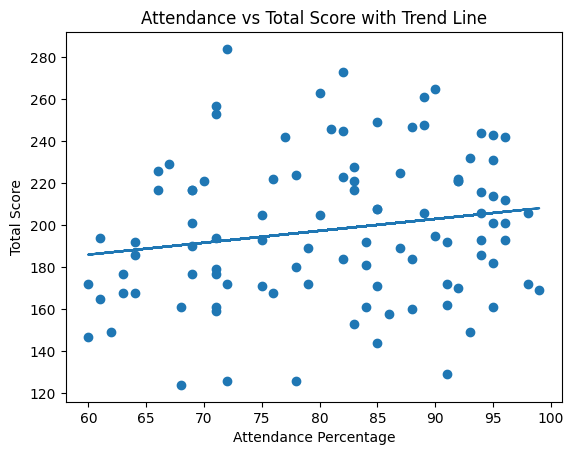

In [16]:
import numpy as np

z = np.polyfit(df["attendance_percent"], df["total_score"], 1)
p = np.poly1d(z)

plt.figure()
plt.scatter(df["attendance_percent"], df["total_score"])
plt.plot(df["attendance_percent"], p(df["attendance_percent"]))
plt.xlabel("Attendance Percentage")
plt.ylabel("Total Score")
plt.title("Attendance vs Total Score with Trend Line")
plt.show()

##### The upward-sloping trend line confirms a positive relationship between attendance percentage and overall academic performance.

In [3]:
df["average_score"] = df[["math_score", "reading_score", "writing_score"]].mean(axis=1)
df.head()

,student_id,gender,math_score,reading_score,writing_score,attendance_percent,total_score,average_score
0,1,Male,92,36,78,89,206,68.666667
1,2,Female,47,36,85,64,168,56.000000
2,3,Male,73,88,92,71,253,84.333333
3,4,Male,63,35,95,75,193,64.333333
4,5,Male,91,53,64,85,208,69.333333


## Subject-wise Average Score Analysis

In [4]:
subject_means = df[["math_score", "reading_score", "writing_score"]].mean()
subject_means

math_score       63.81
reading_score    64.54
writing_score    69.69
dtype: float64

In [5]:
hardest_subject = subject_means.idxmin()
lowest_average = subject_means.min()

print("The hardest subject is:", hardest_subject)
print("Average score:", lowest_average)

The hardest subject is: math_score
Average score: 63.81


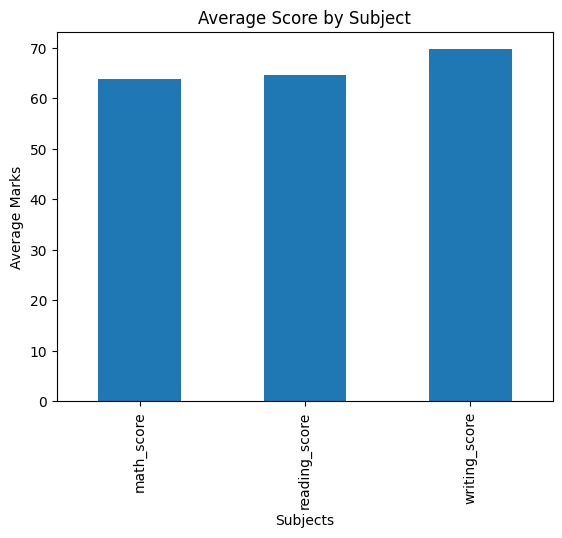

In [6]:
import matplotlib.pyplot as plt

plt.figure()
subject_means.plot(kind='bar')
plt.title("Average Score by Subject")
plt.ylabel("Average Marks")
plt.xlabel("Subjects")
plt.show()

## Top 5 Performing Students

In [7]:
df.sort_values(by="average_score", ascending=False).head(5)

,student_id,gender,math_score,reading_score,writing_score,attendance_percent,total_score,average_score
91,92,Female,91,98,95,72,284,94.666667
78,79,Male,91,88,94,82,273,91.000000
17,18,Female,74,93,98,90,265,88.333333
6,7,Male,77,87,99,80,263,87.666667
10,11,Male,82,89,90,89,261,87.000000


## Gender-wise Performance Analysis

In [8]:
gender_performance = df.groupby("gender")[["math_score", "reading_score", "writing_score"]].mean()
gender_performance

,math_score,reading_score,writing_score
gender,,,
Female,59.285714,62.446429,72.232143
Male,69.568182,67.204545,66.454545


<Figure size 640x480 with 0 Axes>

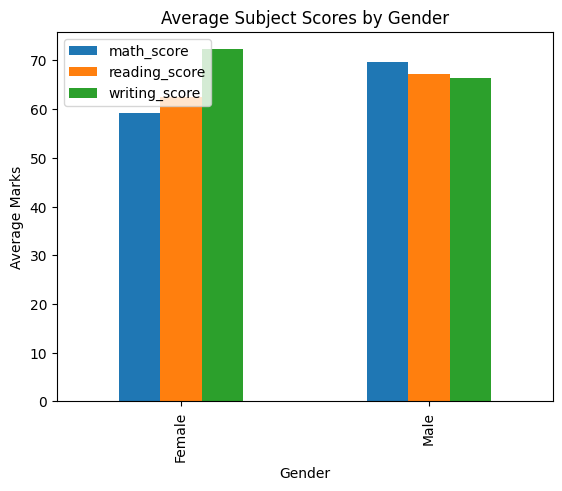

In [9]:
plt.figure()
gender_performance.plot(kind='bar')
plt.title("Average Subject Scores by Gender")
plt.ylabel("Average Marks")
plt.xlabel("Gender")
plt.show()

## Correlation Analysis Between Subjects

In [10]:
correlation = df[["math_score", "reading_score", "writing_score"]].corr()
correlation.round(2)

,math_score,reading_score,writing_score
math_score,1.00,0.03,-0.01
reading_score,0.03,1.00,0.11
writing_score,-0.01,0.11,1.00


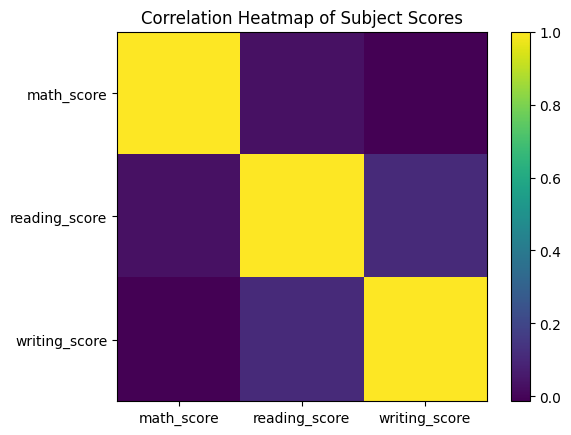

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(correlation)
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title("Correlation Heatmap of Subject Scores")
plt.show()

## Key Insights

1. Mathematics has the lowest average score among all subjects, indicating that it is the most challenging subject for students.

2. Writing has the highest average score, suggesting students perform comparatively better in language-based subjects.

3. There is a noticeable variation in performance across subjects, which indicates uneven academic strength areas.

## Recommendation

The school should implement targeted Mathematics improvement programs such as remedial classes, concept reinforcement sessions, and regular performance tracking to help students strengthen their mathematical skills and improve overall academic outcomes.

## Conclusion

This project analyzed student academic performance using statistical and visualization techniques. 

The analysis revealed that Mathematics has the lowest average score, indicating it is the most challenging subject. Writing emerged as the strongest subject based on overall average performance. Gender-based analysis showed variation in subject strengths, with differences observed in Mathematics and Writing performance.

The correlation analysis demonstrated a positive relationship between subjects, particularly between Reading and Writing, suggesting consistent academic patterns among students.

Overall, the study highlights key performance trends and provides data-driven insights that can support academic improvement strategies and informed decision-making.